Please use the below link to check the answers in the python notebook format:<br>
https://github.com/manupmanoos/ShopifyChallenge

## Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.<br>
b. What metric would you report for this dataset?<br>
c. What is its value?

For answering the above questions the below analysis is done.

In [28]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Reading the excel file into a dataframe.

In [29]:
df = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

Checking first few rows of the dataframe to confirm the dataload.

In [30]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


The dataframe is checked below for null values to check if the data is clean.

In [31]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

The dataframe is clean and hence do not need any missing value handling.

The types of data in the dataframe are checked to see if the datatypes are valid for the columns.

In [32]:
df.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

The data frame is described below to calculate the min,max,mean and standard deviation of all numerical columns.

In [33]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


We can see that the mean of the order_amount column is 3145.128000 which is the current calculated Average Order Value(AOV). The standard deviation is much higher than the mean which indicates that the mean is not a correct statistic for this data the data has large deviations from the mean.

A box plot of the order_amount column is shown below.

<AxesSubplot:xlabel='order_amount'>

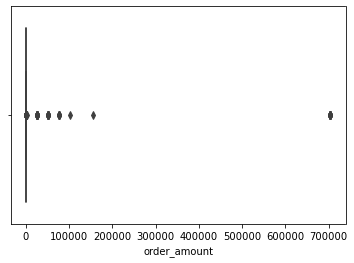

In [34]:
sns.boxplot(x=df['order_amount'])

From the box plot, it is clear that most the order amount is between 0 and 200000 whereas only some values are showing huge variations and has values near 700000. So, these values near 700000 are outliers in this dataset.

A scatter plot of the order amount and total items in the order is shown below.

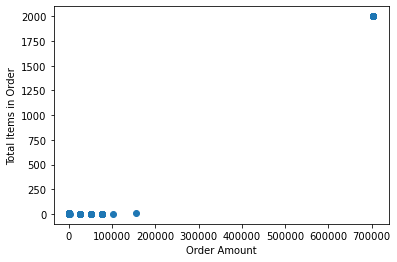

In [35]:
plt.scatter(df['order_amount'], df['total_items'])
plt.xlabel("Order Amount")
plt.ylabel("Total Items in Order")
plt.show()

From the plot we can see that the large number of items in some orders lead to the large value of that orders. This could occur because a local trader might have put in orders for large number of shoes as he has gone out of stock. Since these scenarios are not a regular orders, these are outliers we need to reduce their impacts on our metrics.

We are considering the"Median Order Value(MOV)" metric instead of the AOV to reduce the impact of outliers. Since median considers the middle value among the sorted value in the order amounts, this should not be impacted by some outliers.

In [36]:
df['order_amount'].median()

284.0

So, MOV value is 284.

To further confirm our metric value , we are finding inter-quartile range and removing values below and above 1.5 * inter-quartile range from first quartile and third quartile. This will remove the outlier from the dataframe.

In [37]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

order_id        2499.5
shop_id           51.0
user_id          150.0
order_amount     227.0
total_items        2.0
dtype: float64


In [38]:
df.drop("created_at", axis = 1,inplace=True)
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='order_amount'>

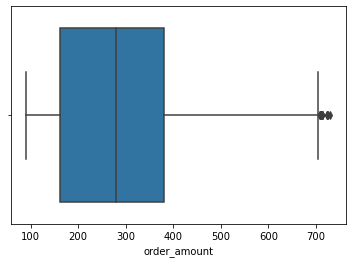

In [39]:
sns.boxplot(x=df_new['order_amount'])

We can see that the outliers are removed on the new dataframe.

In [40]:
df_new.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


The new mean of order amount is 293.715374, which is close to the MOV value of 284. Hence, new metric is perfect for this dataset.

### Answers concluded from the analysis: <br>
a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.<br>
Ans: The data has outliers where the order amount is very high(700000) causing the mean to be large eventhough all the other order ampunts are small. These outliers need to be handled or we need to select a metric which is not impacted by outliers.<br>
b. What metric would you report for this dataset?<br>
Ans: The metric to be reported for this dataset is "Median Order Value(MOV)" which is the median of all the order values.<br>
c. What is its value?<br>
Ans: The value of MOV is 284.

# Question 2
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.



a. How many orders were shipped by Speedy Express in total?

Ans: __54__<br>

The query for this answer is shown below:<br>

__SELECT Count(*) as TotalOrders,ShipperName FROM [Orders] o <br>
inner join [Shippers] s <br>
on o.ShipperID = s.ShipperID<br>
where s.ShipperName = 'Speedy Express'<br>
Group By s.ShipperName ;__<br>

The result of the query is shown below:

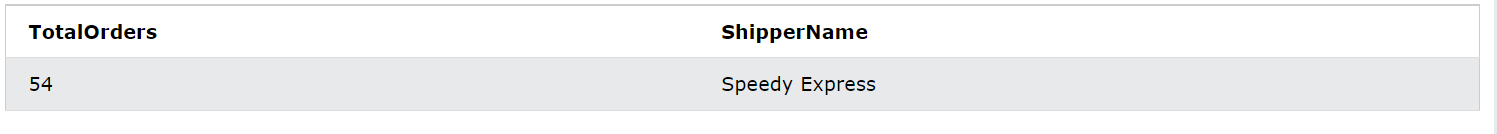

b. What is the last name of the employee with the most orders?

Ans: __Peacock__<br> 

The query for this answer is shown below:<br>

__SELECT Count(*) as TotalOrders,e.Lastname FROM [Employees] e <br> 
inner join [Orders] o <br> 
on o.EmployeeID = e.EmployeeID<br> 
Group By e.EmployeeID <br> 
order by TotalOrders Desc LIMIT 1;__<br> 

The result of the query is shown below:

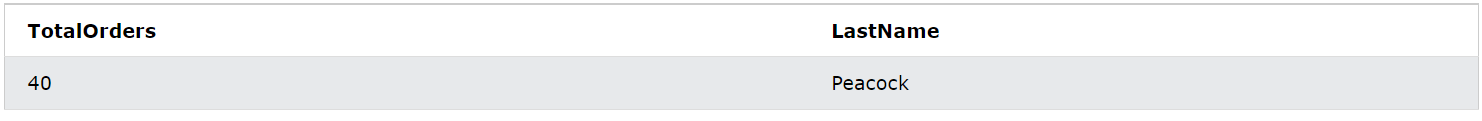

c. What product was ordered the most by customers in Germany?

Ans: __Boston Crab Meat__<br> 

The query for this answer is shown below:<br>

__SELECT SUM(od.Quantity) as TotalQuantity, p.ProductID, p.ProductName FROM [Orders] o<br>
inner join [Customers] c<br>
on o.CustomerID = c.CustomerID<br>
inner join [OrderDetails] od<br>
on od.OrderID = o.OrderID<br>
inner join [Products] p<br>
on p.ProductID = od.ProductID<br>
where c.country ='Germany'<br>
group by p.ProductID<br>
order by TotalQuantity Desc LIMIT 1;__ <br>

The result of the query is shown below:

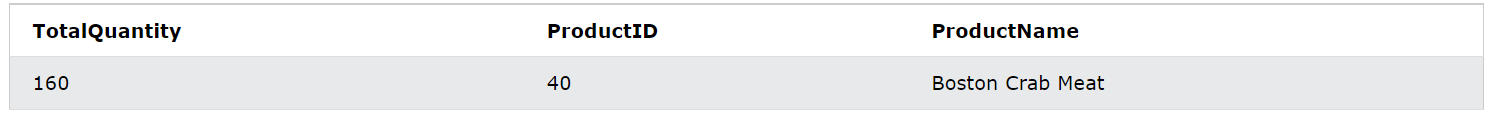